* Loaded Needed Libraries

In [1]:
import numpy as np            
import matplotlib.pyplot as plt    
import tensorflow as tf      
import pandas as pd    
import seaborn as sns    
import pathlib

* Loaded Data 
1. Detect Columns Name

In [6]:
columns_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
raw_datasets = pd.read_csv('D:\\Programming\\Machine Learning Projects\\My Projects\\10- CNN (Tensorflow - Keras)\\Data\\auto-mpg.data',
                           names=columns_names,na_values='?',comment='\t',sep=" ",skipinitialspace=True)

* Copy Dataset
1. dataset.tail() is a method in pandas library of Python that is used to get the last n rows of a DataFrame. By default, n is set to 5, but it can be changed by passing an integer value as an argument.

In [7]:
dataset=raw_datasets.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


1. dataset.pop() is a Python method that removes and returns the last item from a list or dictionary.

In [8]:
dataset.isna().sum()
dataset = dataset.dropna()
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


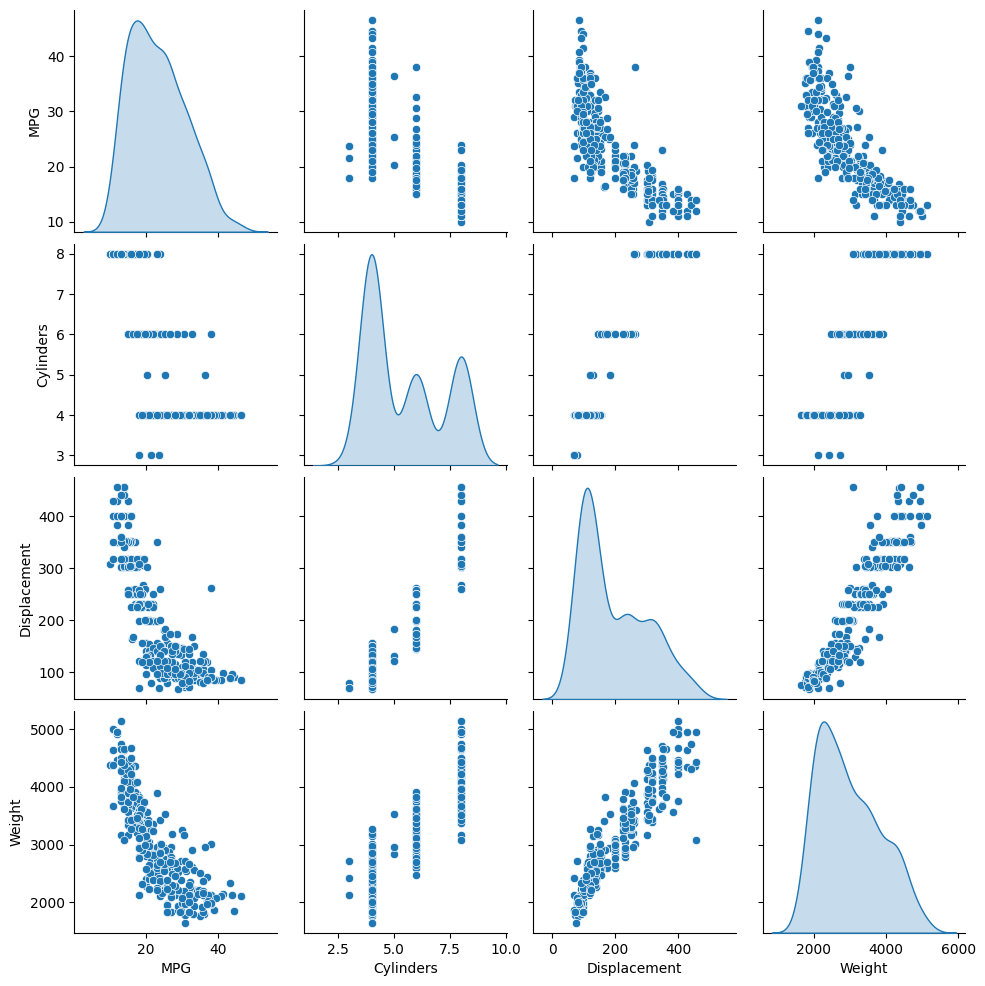

In [9]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

In [10]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

* Make Normalization For Data

In [11]:
def norm(x):
      return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

* Make Neural Network By Using Function

In [12]:
def build_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu,input_shape=[len(train_dataset.keys())]))
    model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(32,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1)) #Make Regression
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mean_absolute_error','mean_squared_error'])
    return model

* Call Model

In [13]:
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
_________________________________________________________________


In [14]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.07059991],
       [ 0.11961265],
       [-0.00949664],
       [ 0.19330329],
       [ 0.24835986],
       [ 0.09447284],
       [ 0.2500854 ],
       [ 0.10889971],
       [ 0.04296884],
       [ 0.17928606]], dtype=float32)

In [15]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [16]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,0.662831,0.507503,0.662831,14.064089,2.914790,14.064089,995
996,2.351306,1.114585,2.351306,7.939536,2.129708,7.939536,996
997,1.292661,0.813862,1.292661,8.028675,2.197616,8.028675,997
998,2.736284,0.985883,2.736284,8.107744,2.213305,8.107744,998
999,0.862191,0.607579,0.862191,7.851495,2.188230,7.851495,999


In [18]:
def plot_history(history):
      hist = pd.DataFrame(history.history)
      hist['epoch'] = history.epoch
      plt.figure()
      plt.xlabel('Epoch')
      plt.ylabel('Mean Abs Error [MPG]')
      plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
      plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
      plt.ylim([0,5])
      plt.legend()
  
      plt.figure()
      plt.xlabel('Epoch')
      plt.ylabel('Mean Square Error [$MPG^2$]')
      plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
      plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
      plt.ylim([0,20])
      plt.legend()
      plt.show()

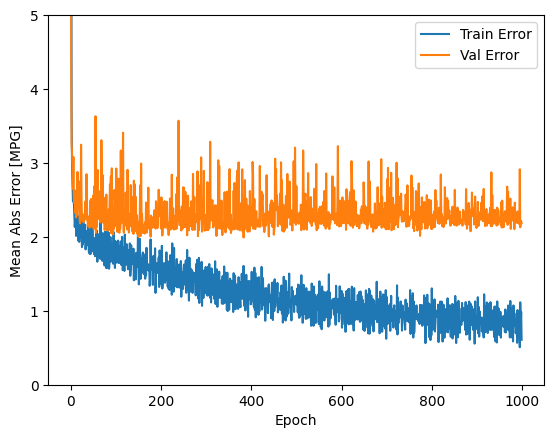

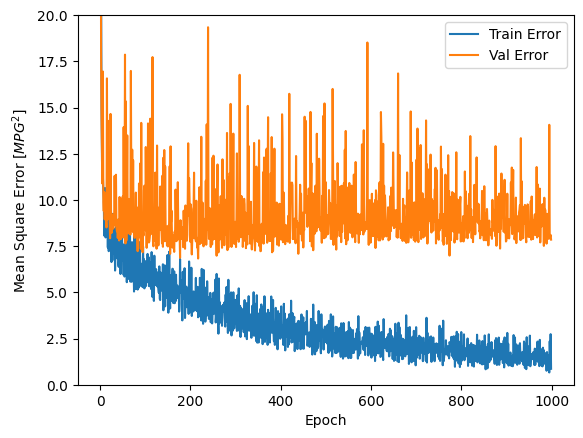

In [19]:
plot_history(history)

In [20]:
model = build_model()

In [21]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [22]:
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


...............................

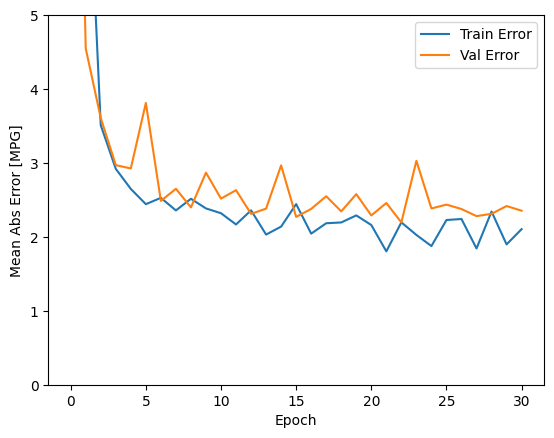

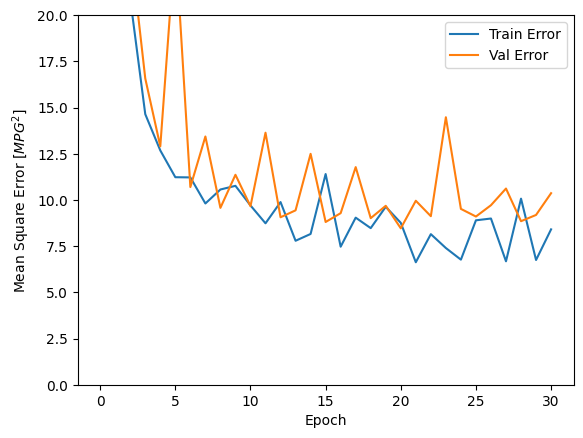

In [23]:
plot_history(history)

In [24]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  2.31 MPG


In [25]:
test_predictions = model.predict(normed_test_data).flatten()

(0.0, 49.932987432479855)

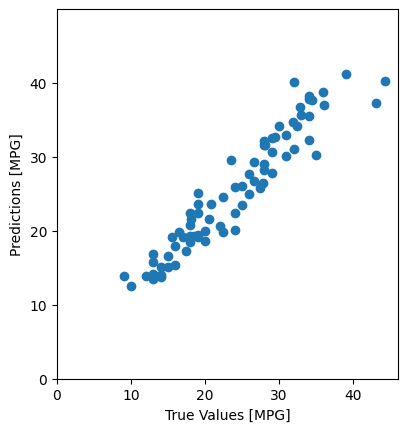

In [26]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

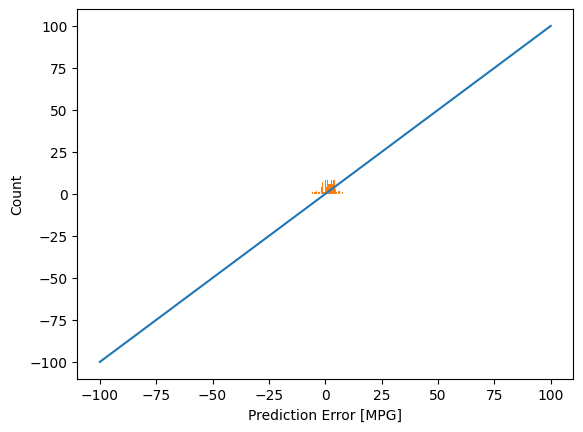

In [27]:
_ = plt.plot([-100, 100], [-100, 100])
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")